# Student ID: 2201389

**You student_id is your 7/8 digit faser number.** 

This is a sample format for CE807: Assignment 2. You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_method1`, `test_method1` for method 1 and `train_method2`, `test_method2` for method 2 to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.** 

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices. 

Before each `code cell`, you must have a `text cell` which explain what code cell is going to do. For each function/class, you need to properly document what are it's input, functionality and output. 

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`. 

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**. 
*   read dataset from './CE807/Assignment2/student_id/' folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './CE807/Assignment2/student_id/models/XXX/' where XXX = [1,2] for both models
*   at testing time you will load models from './CE807/Assignment2/student_id/models/XXX/' where XXX = [1,2] and then test on your data, and save the output in the same folder
*   For Data Size Effect, you model and output save directories are './CE807/Assignment2/student_id/models/XXX/YYY/' where XXX = [1,2] and YYY = [25,50, 75,100]
*   **Your output file based on the test file will be named `output_test.csv` and will have fields `id`, `tweet`, `label` and `out_label`** Note that, `id`, `tweet`, `label` come from `test.csv`, and `out_label` out_label your model’s output, where out_label =[OFF,NOT]. You need to save file in the respective model folders. 




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 16.8 MB/s eta 0:00:00


Let's import all require libraries. 
For example, `numpy`

In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from pickle import NONE
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Let's put your student id as a variable, that you will use different places**

In [3]:
student_id = 2201389 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [4]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Common Codes 

In this section you will write all common codes, for examples


*   Data read
*   Data Splitting
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples, 

student_id = 1234567

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807/Assignment2/student_id/’ in your GDrive

now set all global variable, 
(Example for model 1 with 25% of data)

train_file = os.path.join(GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'train.csv')

MODEL_1_DIRECTORY = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH, ‘models’, ‘1’)

MODEL_1_25_DIRECTORY = os.path.join('MODEL_1_DIRECTORY',‘25’)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY,'output_test.csv')

Sample output directory and file structure: https://drive.google.com/drive/folders/1okgSzgGiwPYYFp7NScEt9MNVolOlld1d?usp=share_link   

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807/Assignment2/1234567/' 

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)
# You need to do this for both models and all data sizes 


List files:  ['test.csv', 'valid.csv', 'train.csv', 'models', 'train_3.csv', 'train_2.csv', 'train_1.csv', 'train_4.csv', 'code.ipynb']
Train file:  gdrive/MyDrive/./CE807/Assignment2/2201389/train.csv
Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/25/output_test.csv


In [7]:

# Define directory paths
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1')
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2')

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY, '25')
MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY, '50')
MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY, '75')
MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY, '100')

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY, '25')
MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY, '50')
MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY, '75')
MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY, '100')

# Create directories if they don't exist
os.makedirs(MODEL_1_25_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_1_50_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_1_75_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_1_100_DIRECTORY, exist_ok=True)

os.makedirs(MODEL_2_25_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_2_50_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_2_75_DIRECTORY, exist_ok=True)
os.makedirs(MODEL_2_100_DIRECTORY, exist_ok=True)

# Print directory paths
print('Model 1 directory: ', MODEL_1_DIRECTORY)
print('Model 2 directory: ', MODEL_2_DIRECTORY)
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)
print('Output file name using model 1 using 25% of train data: ', os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv'))
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)
print('Output file name using model 1 using 50% of train data: ', os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv'))
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)
print('Output file name using model 1 using 75% of train data: ', os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv'))
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)
print('Output file name using model 1 using 100% of train data: ', os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv'))
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)
print('Output file name using model 2 using 25% of train data: ', os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv'))
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)
print('Output file name using model 2 using 50% of train data: ', os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv'))
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)
print('Output file name using model 2 using 75% of train data: ', os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv'))
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)
print('Output file name using model 2 using 100% of train data: ', os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv'))

Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1
Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/2
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/25/output_test.csv
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/50
Output file name using model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/50/output_test.csv
Model 1 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/75
Output file name using model 1 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/75/output_test.csv
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/100
Output file name using model 1 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201389/models/1/100/

Let's see train file

In [8]:
train_data = pd.read_csv(train_file)
train_data.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


Let's show you a sample output file. Notice all fields, `out_label` is your model's output for that `tweet` and `id`

In [9]:
df = pd.read_csv(model_1_25_output_test_file)
df.head()

,tweet,label,output label
0,democrat support antifa muslim brotherhood m i...,1,0
1,revered conservative hated progressivessociali...,0,0
2,first reduces ca url,0,0
3,getting news still parole always make smile fi...,0,0
4,unity demo oppose farright enough enough url,1,0


We are going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels

In [10]:
def compute_performance(y_true, y_pred):
  
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average="macro")
    precision = precision_score(y_true, y_pred, average="macro")
    f_score = f1_score(y_true, y_pred, average="macro")

    print("Accuracy: {:.4f}".format(acc))
    print("Recall: {:.4f}".format(recall))
    print("Precision: {:.4f}".format(precision))
    print("F1 score: {:.4f}".format(f_score))

    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(
        cm,
        index=["Actual Positive", "Actual Negative"],
        columns=["Predicted Positive", "Predicted Negative"],
    )
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="g", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return f_score


# Method 1 Start

In this section you will write all details of your Method 1. 

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset 
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement. 

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


### Spliting the Data

In [11]:
# this block is used to split the data set as per the requirement.

target = 'label'
# Loading the training dataset
train_data = pd.read_csv('/content/gdrive/MyDrive/CE807/Assignment2/2201389/train.csv')

# Splitng and saving the train data into 4 and saving the data set in Gdrive.
# 0.9 is used as we need atleast 0.1 of test data when using train_test_split method
# to overcome used a if condition and gave last train split the whole train data set and then saved it
for i, size in enumerate([0.25, 0.5, 0.75, 0.9]):

    if i != 0.9:
      # Split the data into train and test sets
      train_subset, _ = train_test_split(train_data, test_size=1-size, stratify=train_data[target])
      # Save the train subset to Google Drive
      train_subset.to_csv(f'/content/gdrive/MyDrive/CE807/Assignment2/2201389/train_{i+1}.csv', index=False)
    else:
      train_subset = train_data
      train_subset.to_csv(f'/content/gdrive/MyDrive/CE807/Assignment2/2201389/train_{i+1}.csv', index=False)


### Preprocessing the data

In [12]:
def preprocess_data(train_file):
    # Read the data file
    data = pd.read_csv(train_file, sep=',')

    # making a copy of data to work on
    train_data = data

    # Droping the id column
    train_data = train_data.drop('id', axis=1)

    # Handling missing data
    train_data.dropna(inplace=True)

    # Handling duplicate data
    train_data.drop_duplicates(inplace=True)

    # Removing emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    train_data['tweet'] = train_data['tweet'].apply(lambda tweet: emoji_pattern.sub(r'', tweet))

    # Tokenize and lemmatize remaining words in 'tweet' column
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Removing URLs, user mentions, hashtags, non-alphabetic characters, and stop words
    train_data['tweet'] = train_data['tweet'].apply(lambda x: ' '.join(lemmatizer.lemmatize(t) for t in word_tokenize(re.sub(r'http\S+|@\w+|#\w+|[^a-zA-Z\s]', '', x).lower()) if t not in stop_words))

    # Converting the text labels into binary labels [0 - Not Offensive, 1 - Offensive]
    train_data['label'] = train_data['label'].apply(lambda x: 0 if x == 'NOT' else 1)

    return train_data

## Training Method 1 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

In [13]:
def train_method1(train_file, val_file, model_dir):

    # preprocessing the train and validation data through preprocess function
    train_data = preprocess_data(train_file)
    val_data = preprocess_data(val_file)

    # Extracting bag-of-words features using CountVectorizer
    count_vect = CountVectorizer()
    train_counts = count_vect.fit_transform(train_data["tweet"])
    val_counts = count_vect.transform(val_data["tweet"])

    # Training Decision Tree model
    dt_model = DecisionTreeClassifier()
    dt_model.fit(train_counts, train_data["label"])

    # Training AdaBoost model 
    ab_model = AdaBoostClassifier(base_estimator=dt_model)
    ab_model.fit(train_counts, train_data["label"])

    # Save model and vectorizer file into the directory and using try and catch method
    # to catch any expection or error while saving the file
    try:
        os.makedirs(model_dir, exist_ok=True)
        model_path = os.path.join(model_dir, "model.pkl")
        with open(model_path, "wb") as f:
            pickle.dump(ab_model, f)
        count_vect_path = os.path.join(model_dir, "vectorizer.pkl")
        with open(count_vect_path, "wb") as f:
          pickle.dump(count_vect, f)
        print("Model Saved Successfully.")
    except Exception as e:
        print("Error saving AdaBoost model:", e)

    # Prediction on validation set using AdaBoost model
    ab_preds = ab_model.predict(val_counts)

    # Accuracy Calculation on validation score
    ab_accuracy = accuracy_score(val_data["label"], ab_preds)

    return ab_accuracy

## Testing Method 1 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [14]:
def test_method1(test_file, model_file, output_file):

    # Preprocess the test data
    test_data = preprocess_data(test_file)
    
    # Loading CountVectorizer from file and transform test data
    with open(os.path.join(model_file, "vectorizer.pkl"), "rb") as f:
        count_vect = pickle.load(f)
    test_counts = count_vect.transform(test_data["tweet"])

    # Loading AdaBoost model
    with open(os.path.join(model_file, "model.pkl"), "rb") as f:
        ab_model = pickle.load(f)

    # Making predictions on test set using the model
    y_pred = ab_model.predict(test_counts)

    #  Accuracy Calculation on test set
    accuracy = accuracy_score(test_data["label"], y_pred)

    # Saving predicted output along with original data to file
    test_data["output label"] = y_pred
    if not os.path.exists(output_file):
        os.makedirs(output_file)
    output_file = os.path.join(output_file, "output_test.csv")
    test_data.to_csv(output_file, columns=["tweet", "label", "output label"], index=False)

    f1_score_method1 = compute_performance(test_data["label"], y_pred)
    return accuracy, f1_score_method1

## Method 1 End


# Method 2 Start

In this section you will write all details of your Method 2.
 
You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset 
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement. 

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Training Method 2 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

In [15]:
def train_method2(train_file, val_file, model_dir):

    # fetching the data using preprocess_data()
    train_data = preprocess_data(train_file)
    val_data = preprocess_data(val_file)

    # Creating a pipeline to transform the data using TFID Vectorizer and using SVC as final estimator
    pipeline = make_pipeline(TfidfVectorizer(), SVC())

    # Fiting the pipeline on training data
    pipeline.fit(train_data["tweet"], train_data["label"])

    # Evaluating pipeline on validation data
    val_acc = pipeline.score(val_data["tweet"], val_data["label"])
    print(f"Validation accuracy: {val_acc}")

    # Saving the model and vectorizer to the directory
    try:
        joblib.dump(pipeline, os.path.join(model_dir, "model.joblib"))
        joblib.dump(pipeline.named_steps['tfidfvectorizer'], os.path.join(model_dir, "vectorizer.joblib"))
        print("Model saved successfully.")
    except Exception as e:
        print("Error saving model:", e)

    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return val_acc


## Testing Method 2 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [16]:
def test_method2(test_file, model_file, output_dir):

    # Creating the model and vectorizer file path for the load function to load model
    vectorizer_file = model_file
    model_file = os.path.join(model_file,'model.joblib')
    vectorizer = os.path.join(vectorizer_file,'vectorizer.joblib')

    # Loading the saved SVM model and vectorizer
    clf = joblib.load(model_file)
    vectorizer = joblib.load(vectorizer)

    # extraction of test data from drive and pre processing it
    test_data = preprocess_data(test_file)

    # Extracting the tweet and label data from the test set
    test_tweet = test_data['tweet']
    test_label = test_data['label']

    # Converting the test tweets into a document-term matrix using the fitted TfidfVectorizer
    test_tweet_matrix = vectorizer.transform(test_tweet)
    
    # Predicting the labels for the test set
    test_pred = clf.predict(test_tweet)

    # Creating a new column for predicted labels to test data DataFrame
    test_data['output_label'] = test_pred

    # Saving predictions to file with original column names and output label column
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    final_output = pd.DataFrame({'tweet': test_tweet, 'label': test_label, 'output label': test_pred})
    final_output.to_csv(os.path.join(output_dir, 'output_test.csv'), sep='\t', index=False)

    f1_score_method2 = compute_performance(test_label, test_pred)
    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return accuracy_score(test_label,test_pred), f1_score_method2

## Method 2 End


# Other Method/model Start

### Code to run Train_method1 on different subset of train data

In [17]:
# your code
train_files = ['train_1.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv']
val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
test_file = os.path.join(GOOGLE_DRIVE_PATH, "test.csv")
model_directories = [MODEL_1_25_DIRECTORY, MODEL_1_50_DIRECTORY, MODEL_1_75_DIRECTORY, MODEL_1_100_DIRECTORY]

val_accuracy_list = []

for i, train_file in enumerate(train_files):
    train_file_path = os.path.join(GOOGLE_DRIVE_PATH, train_file)
    model_path = os.path.join(model_directories[i])
    val_accuracy = train_method1(train_file_path, val_file, model_path)
    val_accuracy_list.append(val_accuracy*100)

print("Validation accuracies:", val_accuracy_list)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Saved Successfully.


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Saved Successfully.


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Saved Successfully.


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Saved Successfully.
Validation accuracies: [72.49190938511327, 71.19741100323624, 71.62891046386191, 71.62891046386191]


### Code to run Test_method1

Accuracy: 0.7706
Recall: 0.6622
Precision: 0.7194
F1 score: 0.6773


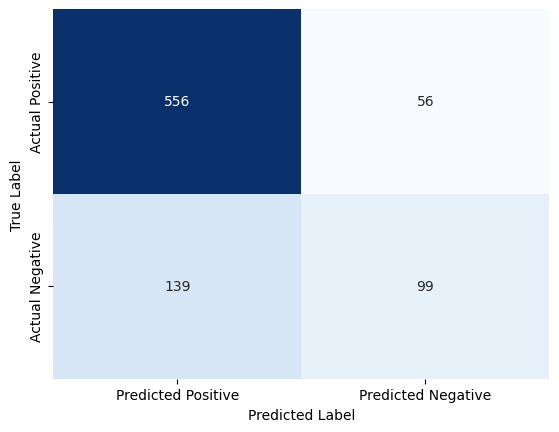

Accuracy: 0.7494
Recall: 0.6450
Precision: 0.6835
F1 score: 0.6560


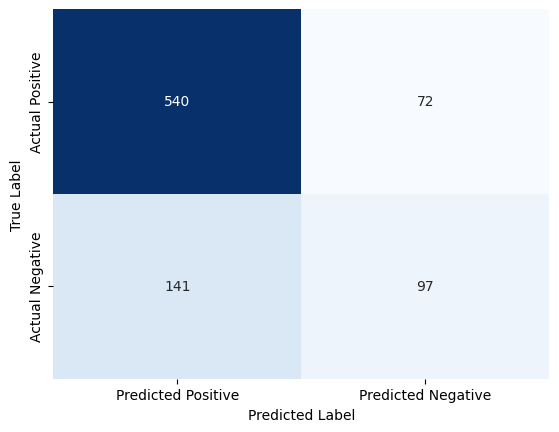

Accuracy: 0.7541
Recall: 0.6469
Precision: 0.6911
F1 score: 0.6590


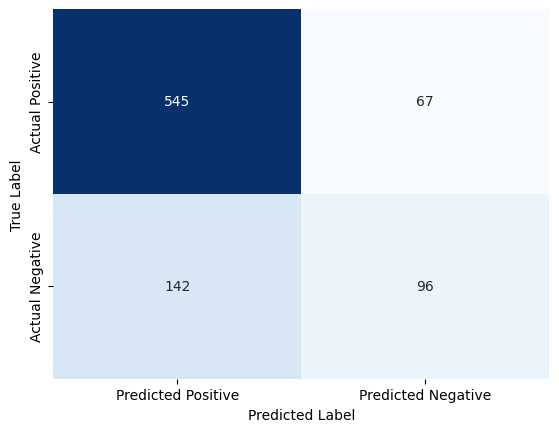

Accuracy: 0.7518
Recall: 0.6453
Precision: 0.6873
F1 score: 0.6569


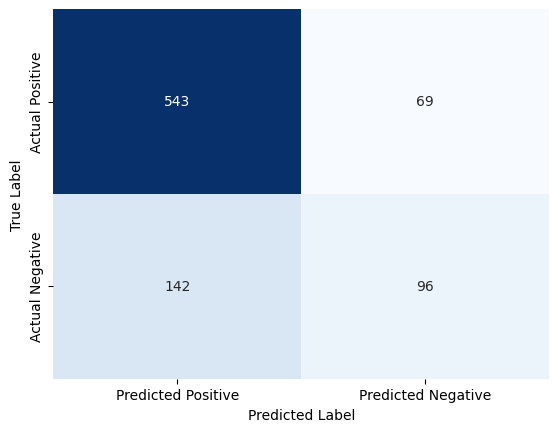

test accuracies: [77.05882352941177, 74.94117647058823, 75.41176470588236, 75.17647058823529]
Average F1 Score: 66.22748925524836


In [18]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')

model_directories = [MODEL_1_25_DIRECTORY, MODEL_1_50_DIRECTORY, MODEL_1_75_DIRECTORY, MODEL_1_100_DIRECTORY]

test_accuracy_list = []
f1_score_list = []

for model_path in model_directories:
    test_accuracy, f1_score_method1 = test_method1(test_file, model_path, model_path)
    test_accuracy_list.append(test_accuracy*100)
    f1_score_list.append(f1_score_method1*100)

f1_score_avg = sum(f1_score_list)/len(f1_score_list)
print("test accuracies:", test_accuracy_list)
print("Average F1 Score:", f1_score_avg)

### Code to run Train_method2 on different train data subsets

In [19]:
# your code
train_files = ['train_1.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv']
val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
model_directories = [MODEL_2_25_DIRECTORY, MODEL_2_50_DIRECTORY, MODEL_2_75_DIRECTORY, MODEL_2_100_DIRECTORY]

val_accuracy_list_method2 = []

for i, train_file in enumerate(train_files):
    train_file_path = os.path.join(GOOGLE_DRIVE_PATH, train_file)
    print(train_file_path)
    model_path = os.path.join(model_directories[i])
    print(model_path)
    val_accuracy = train_method2(train_file_path, val_file, model_path)
    val_accuracy_list_method2.append(val_accuracy*100)

print("Validation accuracies:", val_accuracy_list_method2)

gdrive/MyDrive/./CE807/Assignment2/2201389/train_1.csv
gdrive/MyDrive/./CE807/Assignment2/2201389/models/2/25
Validation accuracy: 0.7335490830636462
Model saved successfully.
gdrive/MyDrive/./CE807/Assignment2/2201389/train_2.csv
gdrive/MyDrive/./CE807/Assignment2/2201389/models/2/50
Validation accuracy: 0.7389428263214671
Model saved successfully.
gdrive/MyDrive/./CE807/Assignment2/2201389/train_3.csv
gdrive/MyDrive/./CE807/Assignment2/2201389/models/2/75
Validation accuracy: 0.7529665587918015
Model saved successfully.
gdrive/MyDrive/./CE807/Assignment2/2201389/train_4.csv
gdrive/MyDrive/./CE807/Assignment2/2201389/models/2/100
Validation accuracy: 0.7421790722761596
Model saved successfully.
Validation accuracies: [73.35490830636462, 73.89428263214671, 75.29665587918015, 74.21790722761597]


### Code to run Test_method2 

Accuracy: 0.7824
Recall: 0.6165
Precision: 0.8525
F1 score: 0.6246


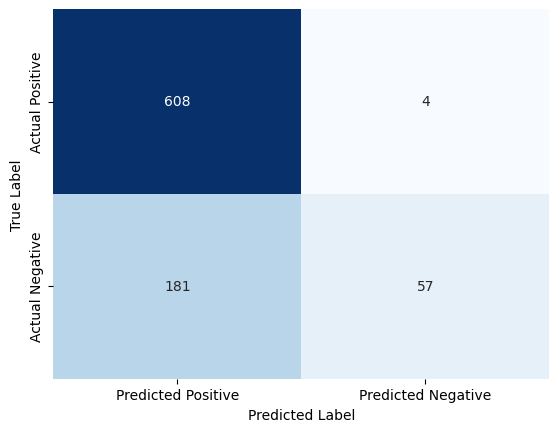

Accuracy: 0.7976
Recall: 0.6502
Precision: 0.8400
F1 score: 0.6705


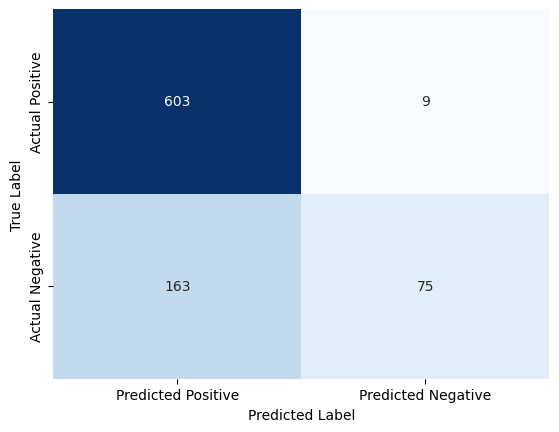

Accuracy: 0.7953
Recall: 0.6524
Precision: 0.8184
F1 score: 0.6729


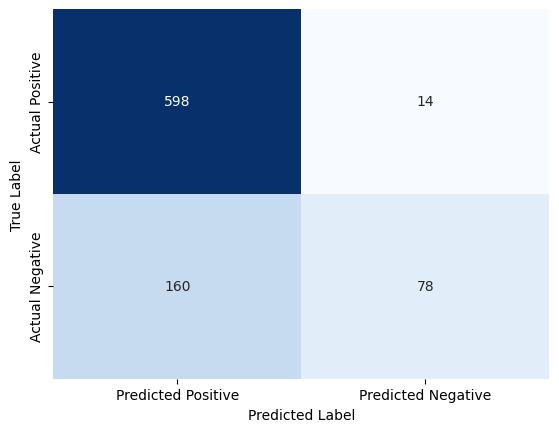

Accuracy: 0.8047
Recall: 0.6680
Precision: 0.8319
F1 score: 0.6921


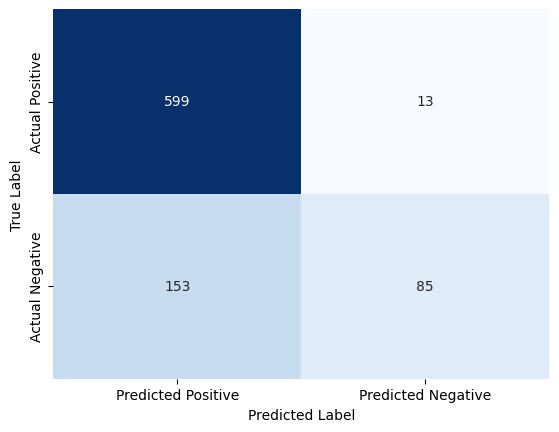

test accuracies: [78.23529411764706, 79.76470588235294, 79.52941176470588, 80.47058823529412]
Average F1 Score: 66.50267215703457


In [20]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')

model_directories = [MODEL_2_25_DIRECTORY, MODEL_2_50_DIRECTORY, MODEL_2_75_DIRECTORY, MODEL_2_100_DIRECTORY]

test_accuracy_list_method2 = []
f1_score_list_method2 = []
for model_path in model_directories:
    test_accuracy, f1_score_method2 = test_method2(test_file, model_path, model_path)
    test_accuracy_list_method2.append(test_accuracy*100)
    f1_score_list_method2.append(f1_score_method2*100)

f1_score_avg_method2 = sum(f1_score_list_method2)/len(f1_score_list_method2)
print("test accuracies:", test_accuracy_list_method2)
print("Average F1 Score:", f1_score_avg_method2)

### Code to plot Accuracy vs Data size for both Validation and Test Accuracy for both the methods

In [21]:
import matplotlib.pyplot as plt

def plot_accuracy(validation_accuracy, test_accuracy, method):
    dataset_sizes = [25, 50, 75, 100]

    # Plot validation accuracy
    plt.plot(dataset_sizes, validation_accuracy, label='Validation Accuracy',
             marker = "o")

    # Plot test accuracy
    plt.plot(dataset_sizes, test_accuracy, label='Test Accuracy',
             marker = "o")

    # Set the x and y axis labels and title
    plt.xlabel('Dataset Size')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Dataset Size for ' + method)

    # Set the legend
    plt.legend()

    # Show the plot
    plt.show()

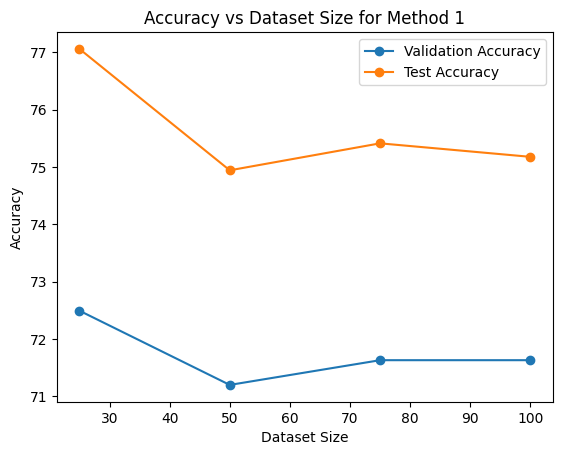

In [22]:
plot_accuracy(val_accuracy_list, test_accuracy_list, "Method 1")

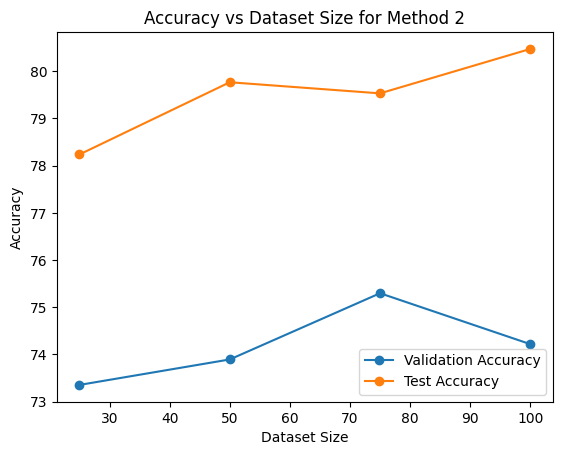

In [23]:
plot_accuracy(val_accuracy_list_method2, test_accuracy_list_method2, "Method 2")

##Other Method/model End